<a href="https://colab.research.google.com/github/smo216/Machine-Learning-Project/blob/master/Machine_Learning_Final_Project_Image_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
posix
/content/gdrive/My Drive/PhD Image Processing/Processed Images/UAB/HP-16


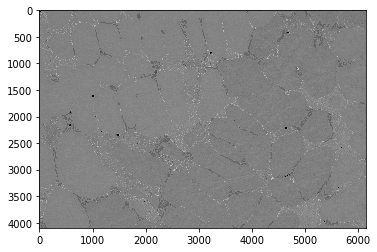

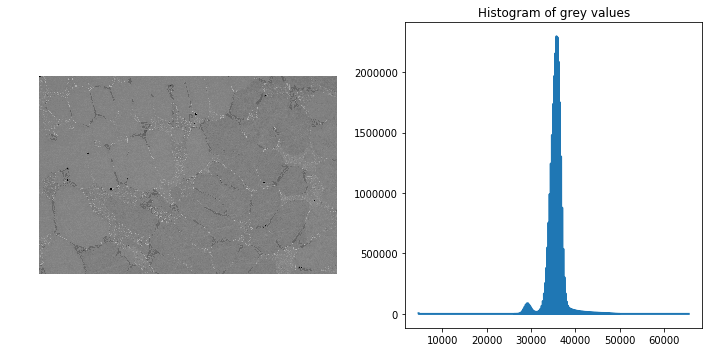

In [22]:
## For Image portion
from google.colab import drive
drive.mount('/content/gdrive')
from PIL import Image
from pylab import *
# importing os module 
import os 
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

from skimage.util import img_as_ubyte
from skimage import data
from skimage.exposure import histogram

print(os.name)
print(os.getcwd()) 

os.chdir("//content//gdrive//My Drive//PhD Image Processing//Processed Images//UAB//HP-16")


filename='HP-16_0.tif'
im=io.imread(filename)
cropim=im[0:4095,0:6143]#.crop(0,0,6143,4095)
#im = array(Image.open(filename))
#plt.imshow(im, cmap=plt.cm.gray)
plt.imshow(cropim, cmap=plt.cm.gray)

#noisy_image = img_as_ubyte(data.camera())
hist, hist_centers = histogram(cropim)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(cropim, cmap=plt.cm.gray)
ax[0].axis('off')

ax[1].plot(hist_centers, hist, lw=2)
ax[1].set_title('Histogram of grey values')

plt.tight_layout()


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# importing os module 
import os 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#Load in data
os.chdir("//content//gdrive//My Drive//PhD casting project//Summary files")

#filename='PhaseFraction.csv'
filename='DTAdata.csv'

data = pd.read_csv(filename)
data.head
data.shape
#F_MC=data['Fraction MC E1']

## Define Data of Interest
labels=data['Sample ID']
#F_Y_MC=data['Fraction Y E1']
#F_MC=data['Fraction MC E1']
#F_Y_M7=data['Fraction Y E2']
#F_M7=data['Fraction M7C3 E2']

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


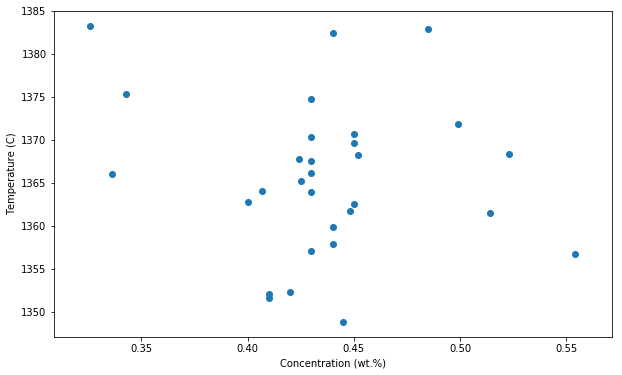

In [0]:
# %% Visualize Data
plt.figure(figsize=(10,6))
plt.scatter(data['C'],data['Liquidus'])
plt.xlabel('Concentration (wt.%)')
plt.ylabel('Temperature (C)')
plt.show()


#Random Forest?


#X, y = make_classification(n_samples=1000, n_features=4,
#                           n_informative=2, n_redundant=0,
#                           random_state=0, shuffle=False)
#clf = RandomForestClassifier(n_estimators=100, max_depth=2,
#                             random_state=0)
#clf.fit(X, y)  


#print(clf.feature_importances_)

#print(clf.predict([[0, 0, 0, 0]]))

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(X, y)

print(f'Model Accuracy: {tree.score(X, y)}')

Model Accuracy: 1.0